In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('questions.csv', on_bad_lines='skip')  # Skip lines with errors
# or
# df = pd.read_csv('questions.csv', error_bad_lines=False)  # Skip lines with errors and don't raise an exception

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404351, 6)

In [5]:
new_df=df.sample(30000)

In [6]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [7]:
new_df.duplicated().sum()

0

In [8]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
315299,Is java programming easy?,Is Java hard to learn?
57457,Are Einstein's gravitational wave and de Brogl...,Is WIMPs incorrect? Will wave-particle duality...
262868,Why is women's butt larger than before?,Why is it hard to change one's habits?
92713,Does Google location track location history as...,Can I use Google Maps for an location based se...
367454,Is it good time to invest in share market?,Is it a good time to invest in the share market?


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])


In [10]:
questions

['Is java programming easy?',
 "Are Einstein's gravitational wave and de Broglie's wave-particle duality wave both waves in the strongly interacting dark matter?",
 "Why is women's butt larger than before?",
 'Does Google location track location history as precisely as the moves app?',
 'Is it good time to invest in share market?',
 'Is it safe to travel in India as a female?',
 'What is it like to work at Tommy Hilfiger?',
 'How reliable is the "New York Post" compared to other newspapers?',
 'Who was your worst teacher and why?',
 'What are some of the best Chrome extensions that you have coded?',
 'What do the levels of zinc and copper in your hair mean?',
 "Why can't India be a tax free country like Dubai?",
 'What is the difference between plinth level and formation level?',
 'Can you substitute sour cream for mayo?',
 'How do pilots avoid turbulence?',
 'What do soldiers keep in all those pockets they have?',
 'How do I delete thousands of old unread emails from my Gmail?',
 'How

In [11]:
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [12]:
type(cv.fit_transform(questions))

scipy.sparse._csr.csr_matrix

In [13]:
type(q1_arr)

numpy.ndarray

In [14]:
print(q1_arr.shape)
print(q2_arr.shape)

(30000, 3000)
(30000, 3000)


In [15]:
# convert to dataframe
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [16]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
315299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [18]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
315299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
262868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
temp_df.shape

(30000, 6001)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1],temp_df.iloc[:,-1],test_size=0.2,random_state=42)


In [21]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7405

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0            0     1
is_duplicate            
0             3415   330
1             1227  1028


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()

# Convert x_train and y_train to NumPy arrays
xgb.fit(x_train.values, y_train.values)  # Use .values to extract NumPy arrays

y_pred = xgb.predict(x_test.values)  # Also convert x_test to NumPy array
accuracy_score(y_test,y_pred)

0.7301666666666666

In [24]:
confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0            0     1
is_duplicate            
0             3347   398
1             1221  1034


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [26]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.6608333333333334

In [28]:
confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0            0     1
is_duplicate            
0             2632  1113
1              922  1333


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7003333333333334

In [31]:
confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0            0     1
is_duplicate            
0             2998   747
1             1051  1204


In [41]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.7503333333333333

In [43]:
confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0            0     1
is_duplicate            
0             3431   393
1             1105  1071


# EDA

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [48]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [49]:
df.duplicated().sum()

0

In [50]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255045
1    149306
Name: count, dtype: int64


is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

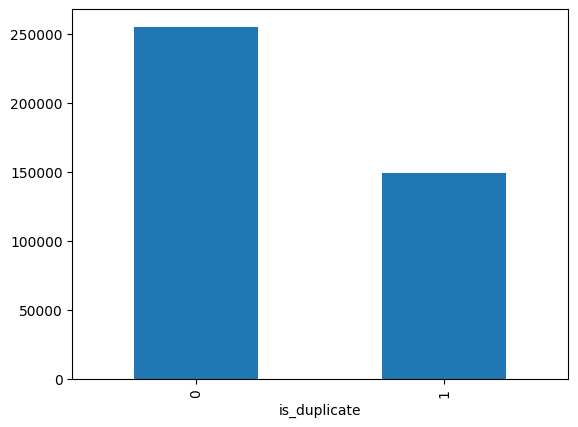

In [51]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [54]:
# Repeated questions
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
qid

In [55]:
print(qid)

0              1
1              3
2              5
3              7
4              9
           ...  
808697    789793
808698    789795
808699    789797
808700    789799
808701    789801
Length: 808702, dtype: int64


In [61]:
np.unique(qid).shape[0]
count_unique=np.unique(qid).shape[0]
print('Number of unique questions',count_unique)

Number of unique questions 789801


In [60]:
x=qid.value_counts()>1
count=x[x].count()
print('Number of questions getting repeated',count)

Number of questions getting repeated 13698


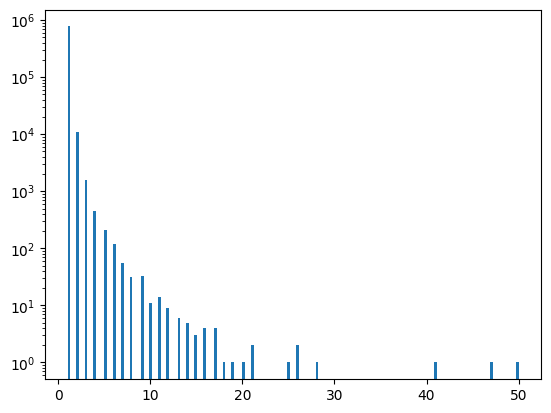

In [64]:
# Repeated question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()